大家好，这篇是有关台大机器学习课程作业三的详解，题目同Coursera。

我的github地址：  
https://github.com/Doraemonzzz

个人主页：  
http://doraemonzzz.com/

作业地址:  
https://www.csie.ntu.edu.tw/~htlin/course/ml15fall/

参考资料:  
https://blog.csdn.net/a1015553840/article/details/51085129  
http://www.vynguyen.net/category/study/machine-learning/page/6/  
http://book.caltech.edu/bookforum/index.php  
http://beader.me/mlnotebook/

#### Problem 1

$$
E_{\mathcal D}[E_{in}(w_{lin})] = \sigma^2(1-\frac{d+1}N)
$$

这个结论的理论推导可以参考我写的Learning from data习题Exercise 3.3,3.4。

对于此题来说，直接把$N$解出来即可
$$
N=\frac {d+1}{1-\frac{E_{\mathcal D}[E_{in}(w_{lin})]}{\sigma^2}}
$$


In [2]:
def f(d,delta,Ein):
    return (d+1)/(1-Ein/(delta**2))

print(f(8,0.1,0.008))

44.99999999999996


所以$N\ge45$即可

#### Problem 2

这题实际上是Learning from data Exercise 3.3以及Problem 3.10的结论，这里一并给出。

(1)$H$是对称矩阵

(2)$H^K=H$ ($K$为任意正整数)

(3)$H$的特征值$\in\{0,1\}$

(4)$H$是半正定矩阵

(5)$trace(H) = d +1$

(6)$H$有$d+1$个特征值为$1$

(1)
$$
\begin{aligned}
H^T&=(X(X^TX)^{-1}X^T)^T
\\&=X((X^TX)^{-1})^TX^T
\\&=X((X^TX)^T)^{-1}X^T
\\&=X(X^TX)^{-1}X^T
\\&=H
\end{aligned}
$$
(2)直接验证即可，先来看$K=2$的情形
$$
\begin{aligned}
H^2&=X(X^TX)^{-1}X^TX(X^TX)^{-1}X^T
\\&=X(X^TX)^{-1}X^T
\\&=H
\end{aligned}
$$
那么对于任意$K$
$$
\begin{aligned}
H^K&=H^2H^{K-2}
\\&=HH^{K-2}
\\&=H^{K-1}
\\&=...
\\&=H
\end{aligned}
$$
(3)因为$H^K=H$，所以对于​$H$的任意特征值$\lambda$
$$
\lambda^K=\lambda 恒成立
\\\lambda=0或1
$$
(4)$H$为对称矩阵且特征值$\in\{0,1\}$，所以由线性代数知识可知$H$半正定

(5)利用迹(trace)的性质$trace(AB) = trace(BA)$
$$
\begin{aligned}
trace(H)&=trace(X(X^TX)^{-1}X^T)
\\&=trace(X^TX(X^TX)^{-1})
\\&=trace(I_{d+1})(注意H^TH为(d+1)\times (d+1)阶矩阵)
\\&=d+1
\end{aligned}
$$
(6)我们知道对称矩阵必然相似于对角阵，所以存在可逆矩阵$P$，使得$H=P^{-1}AP$，那么
$$
d+1=trace(H)=trace(P^{-1}AP)=tr(PP^{-1}A)=tr(A)
$$
而$A$为由$0,1$构成的对角阵(因为$A$和$H$相似且$H$的特征值$\in\{0,1\}$)，所以$H$一共有$d+1$个特征值为$1$

有了以上结论，看此题的选项就很轻松了。

(a),(d),(e)成立，(c)错误，稍微要看一下的是(b)，我们知道$H$的特征值$\in\{0,1\}$，所以$H$不一定可逆，因此(b)也错误。



#### Problem 3

先对原式进行变形
$$
[\![y\neq sign(w^Tx)]\!] \Longleftrightarrow[\![y^2\neq ysign(w^Tx)]\!]\Longleftrightarrow[\![1\neq sign(yw^Tx)]\!]
$$
令$s=yw^Tx$，所以几个误差分别可以写成
$$
err_1=[\![sign(s) \neq 1]\!]
\\err_2=max(0,1-s)
\\err_3=(max(0,1-s))^2
\\err_4=(max(0,-s))
\\err_5=\theta(-s)=\frac{e^{-s}}{1+e^{-s}}=\frac{1}{1+e^{s}}
\\err_6=e^{-s}
$$
接着作图。

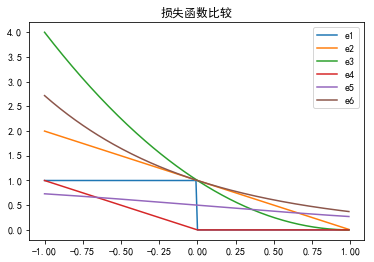

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#构造损失函数
def e1(s):
    if s>0:
        return 0
    else:
        return 1

def e2(s):
    return max(0,1-s)

def e3(s):
    t=max(0,1-s)
    return t**2

def e4(s):
    return max(0,-s)

def e5(s):
    return 1/(1+np.exp(s))

def e6(s):
    return np.exp(-s)

x=np.arange(-1,1,0.01)

y1=[e1(i) for i in x]
y2=[e2(i) for i in x]
y3=[e3(i) for i in x]
y4=[e4(i) for i in x]
y5=[e5(i) for i in x]
y6=[e6(i) for i in x]

plt.plot(x,y1,label='e1')
plt.plot(x,y2,label='e2')
plt.plot(x,y3,label='e3')
plt.plot(x,y4,label='e4')
plt.plot(x,y5,label='e5')
plt.plot(x,y6,label='e6')
plt.legend()
plt.title('损失函数比较')
plt.show()

因此e2,e3,e6,即(a),(b),(e)为$[\![y\neq sign(w^Tx)]\!]$的上界

#### Problem 4

这题要找哪些函数不是处处可导，(d),(e)显然是处处可导的，因为$f(s)=max\{0,s\}$在原点不可导，所以(a),(c)不可导，唯一有点疑问的是(b)，我们来看下$f(s)=(max(0,s))^2$
$$
f(s)=\begin{cases}
s^2(s\ge0)
\\0(s<0)
\end{cases}
$$
显然这个函数也是可导的，所以由复合函数的性质可知(b)也可导。因此这题选(a)(c)

#### Problem 5

$err(w) = max(0, -y_nw^Tx_n)$的意思是对于分类正确的点$err(w)=0$，对于分类不正确的点$err(w)=-y_nw^Tx_n $，我们来求梯度(不考虑不可导点)
$$
\frac {\partial(-y_nw^Tx_n)}{\partial w_i}=-y_nx^{(i)}_n(x^{(i)}_n表示x_n的第i个分量)
\\\nabla(-y_nw^Tx_n)=-y_nx_n
$$
所以对于分类错误的点$(x_n,y_n)$，根据SGD,更新规则为
$$
w(t+1)=w(t)+\eta(-\nabla(-y_nw^Tx_n))=w(t)+\eta y_nx_n
$$
所以PLA可以被看成$err(w) = max(0, -y_nw^Tx_n)$的SGD

#### Problem 6

$$
\frac{\partial E(u,v)}{\partial u}|_{(u,v)=(0,0)}=e^u+ve^{uv}+2u-2v-3 |_{(u,v)=(0,0)}=-2
\\ \frac{\partial E(u,v)}{\partial v}|_{(u,v)=(0,0)}=2e^{2v}+ue^{uv}-2u+4v-2|_{(u,v)=(0,0)}=0
$$

所以
$$
\nabla E(u, v)=(-2,0)^T
$$


#### Problem 7

编程处理即可,需要利用刚刚的偏导数公式，答案为2.82500035668

In [1]:
import numpy as np

def E(u,v):
    return np.exp(u)+np.exp(2*v)+np.exp(u*v)+u*u-2*u*v+2*(v*v)-3*u-2*v

def partial(point):
    u=point[0]
    v=point[1]
    pu=np.exp(u)+v*np.exp(u*v)+2*u-2*v-3
    pv=2*np.exp(2*v)+u*np.exp(u*v)-2*u+4*v-2
    return np.array([pu,pv])

point=np.zeros(2)
eta=0.01

for i in range(5):
    point-=eta*partial(point)
    
print(E(point[0],point[1]))

2.82500035668


#### Problem 8

这题需要用到多元泰勒公式，可以参考[维基百科](https://zh.wikipedia.org/wiki/%E6%B3%B0%E5%8B%92%E5%85%AC%E5%BC%8F#%E5%A4%9A%E5%85%83%E6%B3%B0%E5%8B%92%E5%85%AC%E5%BC%8F)
$$
b_{uu} =\frac 1 2\frac{\partial^2 E(u,v)}{\partial u^2}=\frac 1 2\frac{\partial}{\partial u}\frac{\partial E(u,v)}{\partial u}=\frac 1 2\frac{\partial (e^u+ve^{uv}+2u-2v-3) } {\partial u}=\frac 1 2(e^u+v^2e^{uv}+2)
\\b_{vv}=\frac 1 2\frac{\partial^2 E(u,v)}{\partial v^2}=\frac 1 2\frac{\partial}{\partial v}\frac{\partial E(u,v)}{\partial v}=\frac 1 2\frac{\partial{(2e^{2v}+ue^{uv}-2u+4v-2)}}{\partial v}=\frac 12 (4e^{2v}+u^2e^{uv}+4)
\\ b_{uv}=\frac{\partial^2 E(u,v)}{\partial u \partial v}=\frac{\partial(e^u+ve^{uv}+2u-2v-3)}{\partial v}=(e^{uv}+uve^{uv}-2)
\\b_{u} =\frac{\partial E(u,v)}{\partial u}=e^u+ve^{uv}+2u-2v-3
\\b_{v}=\frac{\partial E(u,v)}{\partial v}=2e^{2v}+ue^{uv}-2u+4v-2
\\b=E(u,v)
$$
将$u=v=0$带入可得
$$
b_{uu}=\frac 3 2
\\b_{vv}=4
\\b_{uv}=-1
\\b_u=-2
\\b_v=0
\\b=3
$$


#### Problem 9

由题设我们知道Hessian矩阵正定，此处的Hessian矩阵为
$$
\nabla^2 E(u, v)=
\left[
 \begin{matrix}
 \frac{\partial^2 E(u,v)}{\partial u^2} &   \frac{\partial^2 E(u,v)}{\partial u \partial v}  \\
   \frac{\partial^2 E(u,v)}{\partial u \partial v} &  \frac{\partial^2 E(u,v)}{\partial v^2}
  \end{matrix}
  \right]
$$
那么最优方向为
$$
\left[\begin{matrix} 
\Delta u^*
\\ \Delta v^*
\end{matrix}\right] 
=- (\nabla^2 E(u, v))^{-1}\nabla E(u, v)
$$
一般性的结论可以参考凸优化的课本，关于这题可以简单证明下。

现在要对$\hat E_2(\Delta u, \Delta v)=b_{uu}(\Delta u)^2+b_{vv}(\Delta v)^2+b_{uv}(\Delta u)(\Delta v)+b_u\Delta u + b_v\Delta v + b$求最小值，令$\Delta u =t,\Delta v=s$
$$
\begin{aligned}
\hat E_2(\Delta u, \Delta v)&=b_{uu}(\Delta u)^2+b_{vv}(\Delta v)^2+b_{uv}(\Delta u)(\Delta v)+b_u\Delta u + b_v\Delta v + b
\\&=b_{uu} t^2+b_{vv}(s^2)+b_{uv}st+b_ut+b_vs+b
\end{aligned}
$$
由Hessian矩阵的正定性我们知道
$$
2b_{uu}= \frac{\partial^2 E(u,v)}{\partial u^2}>0
\\ 2b_{vv}= \frac{\partial^2 E(u,v)}{\partial v^2}>0
\\ \frac{\partial^2 E(u,v)}{\partial u^2} \frac{\partial^2 E(u,v)}{\partial u^2}-  (\frac{\partial^2 E(u,v)}{\partial u \partial v})^2=4b_{uu}b_{uv}-b_{uv}^2>0
$$
所以可以对$\hat E_2(\Delta u, \Delta v)$进行配方(二次项系数不为$0$)，配方得
$$
\begin{aligned}
\hat E_2(\Delta u, \Delta v)&=b_{uu} t^2+b_{vv}(s^2)+b_{uv}st+b_ut+b_vs+b
\\&=b_{uu}(t-a)^2+b_{vv}(s-b)^2+b_{uv}(s-a)(t-b)+C
\end{aligned}
$$
其中$a,b,C$均为常数，后续会求解出来，令$t_1=t-a,s_1=s-b$
$$
\begin{aligned}
\hat E_2(\Delta u, \Delta v)&=b_{uu}t_1^2+b_{vv}s_1^2+b_{uv}t_1s_1+C
\\&=b_{uu}(t_1+\frac{b_{uv}}{2b_{uu}}s_1)^2+(b_{vv}-\frac{b_{uv}^2}{4b_{uu}})s_1^2+C
\end{aligned}
$$
之前已经有$b_{uu}>0,b_{vv}>0,4b_{uu}b_{uv}-b_{uv}^2>0$，所以
$$
b_{vv}-\frac{b_{uv}^2}{4b_{uu}}=\frac{4b_{uu}b_{vv}-b_{uv}^2}{4b_{uu}}>0
$$
从而
$$
\hat E_2(\Delta u, \Delta v)\ge C
\\当且仅当t_1+\frac{b_{uv}}{2b_{uu}}s_1=0,s_1=0时等号成立
\\即t_1=s_1=0
$$
因为$t_1=t-a,s_1=s-b,\Delta u =t,\Delta v=s$，所以等号成立条件为
$$
\Delta u= t=a,\Delta v=s=b
$$
接下来求解$a,b$
$$
\begin{aligned}
b_{uu}(t-a)^2+b_{vv}(s-b)^2+b_{uv}(t-a)(s-b)+C&=b_{uu}(t^2-2at+a^2)+b_{vv}(s^2-2sb+b^2)+b_{uv}(st-as-bt+ab)+C
\\&=b_{uu}t^2+b_{vv}s^2+b_{uv}st-(2ab_{uu}+bb_{uv})t-(2bb_{vv}+ab_{uv})s+C^{'}
\\&=b_{uu} t^2+b_{vv}s^2+b_{uv}st+b_ut+b_vs+b
\end{aligned}
$$
那么
$$
\begin{cases}
-2b_{uu}a-b_{uv}b=b_u
\\-b_{uv}a-2b_{vv}b=b_v
\end{cases}
\\
\left[
\begin{matrix}
-2b_{uu} &   -b_{uv}  \\
-b_{uv}  &   -2b_{vv} 
\end{matrix}
\right]
\left[\begin{matrix} 
a
\\ b
\end{matrix}\right]
=
\left[\begin{matrix} 
b_u\\b_v
\end{matrix}\right]
\\
$$
回顾之前的等式
$$
2b_{uu}= \frac{\partial^2 E(u,v)}{\partial u^2}, 2b_{vv}= \frac{\partial^2 E(u,v)}{\partial v^2},b_{uv}=\frac{\partial^2 E(u,v)}{\partial u \partial v}
\\b_{u} =\frac{\partial E(u,v)}{\partial u},b_{v}=\frac{\partial E(u,v)}{\partial v}
\\
\nabla^2 E(u, v)=
\left[
 \begin{matrix}
 \frac{\partial^2 E(u,v)}{\partial u^2} &   \frac{\partial^2 E(u,v)}{\partial u \partial v}  \\
   \frac{\partial^2 E(u,v)}{\partial u \partial v} &  \frac{\partial^2 E(u,v)}{\partial v^2}
  \end{matrix}
  \right]
  \\
  \nabla E(u, v)=
\left[
 \begin{matrix}
 \frac{\partial E(u,v)}{\partial u}  \\
\frac{\partial E(u,v)}{\partial v}
  \end{matrix}
  \right]
$$
原方程可化为
$$
-\left[
\begin{matrix}
\frac{\partial^2 E(u,v)}{\partial u^2}&   \frac{\partial^2 E(u,v)}{\partial u \partial v} \\
\frac{\partial^2 E(u,v)}{\partial u \partial v}  &    \frac{\partial^2 E(u,v)}{\partial v^2}
\end{matrix}
\right]
\left[\begin{matrix} 
a \\
 b
\end{matrix}\right]
=
\left[\begin{matrix} 
\frac{\partial E(u,v)}{\partial u} \\\frac{\partial E(u,v)}{\partial v}
\end{matrix}\right]
\\   
\left[\begin{matrix} 
\Delta u^*
\\ \Delta v^*
\end{matrix}\right] =
\left[\begin{matrix} 
a \\ b
\end{matrix}\right]
=- (\nabla^2 E(u, v))^{-1}\nabla E(u, v)
$$
这样就验证了牛顿方法的正确性。

#### Problem 10

有了公式之后编程实现即可


In [2]:
import numpy as np
from numpy.linalg import inv

def E(u,v):
    return np.exp(u)+np.exp(2*v)+np.exp(u*v)+u*u-2*u*v+2*(v*v)-3*u-2*v

def partial(point):
    u=point[0]
    v=point[1]
    pu=np.exp(u)+v*np.exp(u*v)+2*u-2*v-3
    pv=2*np.exp(2*v)+u*np.exp(u*v)-2*u+4*v-2
    return np.array([pu,pv])

def dpartial(point):
    u=point[0]
    v=point[1]
    puu=np.exp(u)+np.exp(u*v)*(v**2)+2
    pvv=4*np.exp(2*v)+np.exp(u*v)*(u**2)+4
    puv=np.exp(u*v)*(1+u*v)-2
    return np.array([[puu,puv],[puv,pvv]])

point=np.zeros(2)
eta=0.01

for i in range(5):
    point-=inv(dpartial(point)).dot(partial(point))
    
print(E(point[0],point[1]))

2.36082334564


#### Problem 11

这题问的是这六个点能否被直线和二次曲线shatter，比较简单，作图即可，这六个点可以被shatter.

#### Problem 12

先回顾题意，假设有$N$个点$x_1,...x_N,x\in R^d$，现在构造这样一个$R^d$到$R^N$的映射
$$
(Φ(x))_n = z_n = [\![x = x_n]\!]
$$
这题有点抽象，我们举$N=3$的例子看一下
$$
\begin{aligned}
Φ(x_1)&=((Φ(x_1))_1,(Φ(x_1))_2,(Φ(x_1))_3)
\\&=([\![x_1 = x_1]\!],[\![x_1 = x_2]\!],[\![x_1 = x_3]\!])
\\&=(1,0,0)
\end{aligned}
$$
所以其实这题很简单，是将$N$个$R^d$空间上的点映射到$R^N$上，我们知道$R^N$上感知机的$d_{vc}=N+1$，所以$N$个点一定能被shatter,所以
$$
d_{vc}(H_Φ)=+\infty
$$


这里先根据题意产生一组点，作图看一下

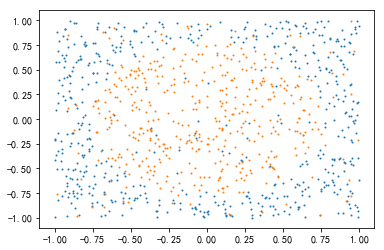

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#产生n组点
def generate(n):
    data=[]
    for i in range(n):
        x=np.random.uniform(-1,1)
        y=np.random.uniform(-1,1)
        flag=np.sign(x*x+y*y-0.6)
        p=np.random.random()
        if (p<0.1):
            flag*=-1
        data.append([x,y,flag])
    return data
        
data=generate(1000)

x1=[i[0] for i in data if i[-1]>0]
y1=[i[1] for i in data if i[-1]>0]
x2=[i[0] for i in data if i[-1]<0]
y2=[i[1] for i in data if i[-1]<0]

plt.scatter(x1,y1,s=1)
plt.scatter(x2,y2,s=1)
plt.show()

#### Problem 13

这题直接对数据做回归，需要模拟1000次。这里利用了公式来求回归的结果
$$
w=(X^TX)^{-1}X^Ty
$$



0.50336


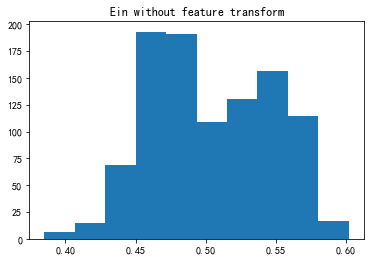

In [10]:
from numpy.linalg import inv

Ein=np.array([])
for i in range(1000):
    data=generate(1000)
    X=np.array([[1]+i[:-1] for i in data])
    Y=np.array([i[-1] for i in data])

    w=inv(X.T.dot(X)).dot(X.T).dot(Y)

    error=np.sum(np.sign(X.dot(w)*Y)<0)/1000
    Ein=np.append(Ein,error)

print(np.average(Ein))
plt.hist(Ein)
plt.title('Ein without feature transform')
plt.show()

所以$E_{in}$的均值约为$0.5$

#### Problem 14

先做特征转换，再重复上题的步骤，画出$\tilde w_3$的直方图，这里把15题的任务一起做了。

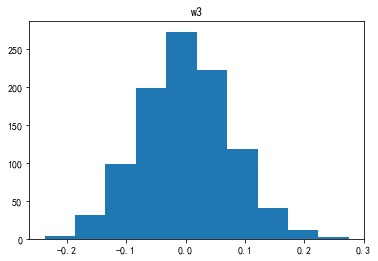

[ -9.92410543e-01   1.64976493e-03  -6.48205307e-04   1.52070206e-04
   1.55620104e+00   1.55888923e+00]
w3的平均值0.000152070206015


In [27]:
W=[]
Eout=np.array([])
for i in range(1000):
    data=generate(1000)
    X=np.array([[1]+i[:-1]+[i[0]*i[1],i[0]**2,i[1]**2] for i in data])
    Y=np.array([i[-1] for i in data])
    
    w=inv(X.T.dot(X)).dot(X.T).dot(Y)
    
    #测试数据
    data1=generate(1000)
    X1=np.array([[1]+i[:-1]+[i[0]*i[1],i[0]**2,i[1]**2] for i in data1])
    Y1=np.array([i[-1] for i in data1])

    error=np.sum(np.sign(X1.dot(w)*Y1)<0)/1000
    Eout=np.append(Eout,error)
    
    #记录w
    W.append(w)

W=np.array(W)
w3=np.array([i[3] for i in W])
plt.hist(w3)
plt.title('w3')
plt.show()

print(W.mean(axis=0))
print("w3的平均值"+str(w3.mean()))

#### Problem 15

做出$E_{out}$的直方图

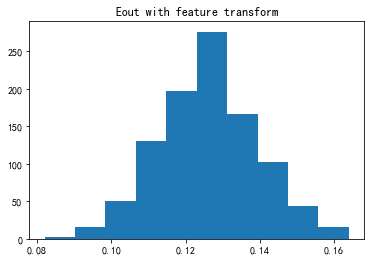

0.125974


In [28]:
plt.hist(Eout)
plt.title('Eout with feature transform')
plt.show()
print(Eout.mean())

所以$E_{out}$的平均值为0.126左右

#### Problem 16

这题实际上是多元Logistic回归，同课件里的例子，我们要最大化似然函数，这等价于题目中所说的最小化负的对数似然函数，先把似然函数求解出来
$$
L=\prod_{j=1}^{N}\frac{exp(w_{y_j}^T x_j)}{\sum_{i=1}^K exp(w_i^T x_j)}
\\ln(L)=\sum_{j=1}^{N}[ln(exp(w_{y_j}^T x_j))-ln(\sum_{i=1}^K exp(w_i^T x_j))]=\sum_{j=1}^{N}[w_{y_j}^T x_j-ln(\sum_{i=1}^K exp(w_i^T x_j))]
$$
所以只要最小化
$$
E_{in}=-\frac{ln(L)}{N}=\frac 1 N\sum_{j=1}^{N}[ln(\sum_{i=1}^K exp(w_i^T x_j))-w_{y_j}^T x_j]
$$
即可

#### Problem 17

求偏导即可
$$
\begin{aligned}
\frac {\partial E_{in}}{\partial w_n}&=\frac  {\partial (\frac 1 N\sum_{j=1}^{N}[ln(\sum_{i=1}^K exp(w_i^T x_j))-w_{y_j}^T x_j])}{\partial w_n}
\\&=\frac 1N\sum_{j=1}^{N}( \frac{exp(w_n^Tx_j) x_j}{\sum_{i=1}^K exp(w_i^T x_j)}-[\![y_j=n]\!]x_j)
\\&=\frac 1N\sum_{j=1}^{N}(h_n(x_j)-[\![y_j=n]\!])x_j
\end{aligned}
$$

#### Problem 18

使用梯度下降公式
$$
\begin{aligned}
\nabla E_{in}(w)
&=-\frac 1N \sum_{n=1}^N\frac{y_nx_n}{1+e^{y_nw^Tx_n}}
\\&=\frac 1N \sum_{n=1}^N-{y_nx_n}\theta(-y_nw^Tx_n)
\end{aligned}
$$


In [3]:
import numpy as np

train=[]
test=[]

#数据读入
with open('hw3_train.dat') as file:
    for i in file.readlines():
        train.append([1]+list(map(float,i.strip().split(' '))))

with open('hw3_test.dat') as file:
    for i in file.readlines():
        test.append([1]+list(map(float,i.strip().split(' '))))
        
train=np.array(train)
test=np.array(test)

#定义函数
def f(y,w,x):
    temp=y*w.dot(x)
    return (-y*x)/(np.exp(temp)+1)

def sig(w,x):
    return 1/(math.exp(-w.dot(x))+1)

#数据维度
m=train.shape[1]-1
#数据组数
n=train.shape[0]

w=np.zeros(m)
k=0.001

for i in range(2000):
    s=np.zeros(m)
    for j in range(n):
        s+=f(train[j][-1],w,train[j][:-1])
    s=s/n
    w-=k*s

#计算Xw
r1=test[:,:-1].dot(w)
#计算sign(Xw)
r2=np.sign(r1)
#求出误差
print((r2!=test[:,-1]).sum()/test.shape[0])
print(w)

0.475
[ 0.01878417 -0.01260595  0.04084862 -0.03266317  0.01502334 -0.03667437
  0.01255934  0.04815065 -0.02206419  0.02479605  0.06899284  0.0193719
 -0.01988549 -0.0087049   0.04605863  0.05793382  0.061218   -0.04720391
  0.06070375 -0.01610907 -0.03484607]


所以$E_{out}$为0.475

#### Problem 19

取$\eta=0.01$

In [4]:
w=np.zeros(m)
k=0.01

for i in range(2000):
    s=np.zeros(m)
    for j in range(n):
        s+=f(train[j][-1],w,train[j][:-1])
    s=s/n
    w-=k*s

#计算Xw
r1=test[:,:-1].dot(w)
#计算sign(Xw)
r2=np.sign(r1)
#求出误差
print((r2!=test[:,-1]).sum()/test.shape[0])
print(w)

0.22
[-0.00385379 -0.18914564  0.26625908 -0.35356593  0.04088776 -0.3794296
  0.01982783  0.33391527 -0.26386754  0.13489328  0.4914191   0.08726107
 -0.25537728 -0.16291797  0.30073678  0.40014954  0.43218808 -0.46227968
  0.43230193 -0.20786372 -0.36936337]


所以$E_{out}$为0.22

#### Problem 20

使用随机梯度下降，只要对之前的式子稍作修改即可。

In [7]:
w=np.zeros(m)
k=0.001

for i in range(2000):
    j=np.random.choice(n)
    s=f(train[j][-1],w,train[j][:-1])
    w-=k*s

#计算Xw
r1=test[:,:-1].dot(w)
#计算sign(Xw)
r2=np.sign(r1)
#求出误差
print((r2!=test[:,-1]).sum()/test.shape[0])
print(w)

0.477
[ 0.03102133 -0.00824134  0.05216681 -0.02260935  0.02279948 -0.03096168
  0.01339008  0.05210572 -0.00518606  0.02777817  0.07374788  0.03573774
 -0.01246505 -0.00478996  0.04042543  0.06805246  0.07474674 -0.04407857
  0.06226404 -0.01511765 -0.03630915]


所以$E_{out}$为0.477

以下两题为附加题

#### Problem 21

先回顾题目
$$
h = (h(x_1), h(x_2),... , h(x_N))\\
y = (y_1,y_2, ... , y_N)\\
RMSE(h) =\sqrt{\frac 1N \sum_{i=1}^{N}(y_n − h(x_n))^2}
$$
题目问的是要计算$h^Ty$，至少需要调用几次$RMSE(h) $，注意这里只知道$h$。首先肯定要求$y$，因为有$N$个未知数，所以第一感觉是要调用$N$次，但是$N=1$时就不成立，因为有平方项。所以推测调用$N$次不行，接下来证明这个结论，注意这里$h,y$为行向量，所以和一般看到的形式略有不同。

对$RMSE(h) $进行改写
$$
\begin{aligned}
RMSE(h) &=\sqrt{\frac 1N \sum_{i=1}^{N}(y_n − h(x_n))^2}
\\&=\sqrt{\frac 1N ||h-y||^2}
\\&=\sqrt{\frac 1N (h-y)(h-y)^T}
\\&=\sqrt{\frac 1N (yy^T-2hy^T+hh^T)}
\end{aligned}
$$
两边平方移项可得
$$
yy^T-2hy^T+hh^T=N\times (RMSE(h))^2
$$
现在对两个不同的$h_1,h_2$调用$RMSE(h) $
$$
yy^T-2h_1y^T+h_1h_1^T=N\times (RMSE(h_1))^2\\
yy^T-2h_2y^T+h_2h_2^T=N\times (RMSE(h_2))^2\\
两式相减可得\\
2(h_2-h_1)y^T=N\times (RMSE(h_1))^2-N\times (RMSE(h_2))^2
$$
这样就得到了一个线性方程。现在对$h_1,h_2,...,h_{k}$分别调用$RMSE(h) $，计算$RMSE(h_i)-RMSE(h_1)$，其中$(i=2,...k)$，根据之前所述可以得到$k-1$个线性方程组，有如下形式
$$
M_1y^T=M_2\\
M_1\in R^{(k-1)\times N},y^T\in R^N,M_2\in R^{k-1}
$$
由线性代数知识我们知道
$$
当r(M_1)<N时，该方程有无穷多组解，当r(M_1)=N时，该方程有唯一解，其中r(M)表示矩阵M的秩。
$$
所以当$k=N$时，$r(M_1)\le k-1<N$，此时有无穷多组解，所以无法确定$y = (y_1,y_2, ... , y_N)$；当$k=N+1$时，$r(M_1)$可能为$N$，若$r(M_1)=N$，此时可以唯一解出$y = (y_1,y_2, ... , y_N)$。

综上，至少需要调用$N+1$次$RMSE(h) $。



#### Problem 22

为方便叙述，这里做以下记号，注意这里为列向量，和上题有所不同
$$
h= \left(
 \begin{matrix}
   h_1(x_1) & h_2(x_1) & ... & h_K(x_1)\\
   h_1(x_2) & h_2(x_2) & ... & h_K(x_2) \\
     ...  &  ...  & ... &  ...  \\
 h_1(x_N) & h_2(x_N) & ... & h_K(x_N)
  \end{matrix}
  \right) \in R^{N\times K}\\
  w=(w_1,w_2,...,w_K)^T\in R^{ K}\\
  y= (y_1,y_2, ... , y_N)^T
$$
那么$RMSE(H) $可以表示为
$$
RMSE(H) =\sqrt{\frac 1N ||y-hw||^2}=\sqrt{\frac 1N (y-hw)^T(y-hw)}
$$
由线性回归的推导我们知道最小化$RMSE(H)$的$w$满足以下条件
$$
X^TXw=X^Ty
$$
$X$已知，$y$未知，所以求出$y$即可，由上一题我们知道至少调用$N+1$次$RMSE(H)$就可以求出$y$，所以这题也至少需要调用$N+1$次。